In [1]:
library(Seurat)
library(ggplot2)
library(aricode)
dirs="/data02/tguo/space_batch_effect/Hippo/"

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject



10X

In [20]:
brain1=readRDS(paste(dirs,"origin/10X_coronal_brain.rds",sep=""))
brain2=readRDS(paste(dirs,"origin/10X_coronal_brain_DAPI.rds",sep=""))
brain3=readRDS(paste(dirs,"origin/10X_coronal_brain_FFPE.rds",sep=""))

In [34]:
data=data.frame(nCount=c(mean(brain1$nCount_Spatial),mean(brain2$nCount_Spatial),mean(brain3$nCount_Spatial)),
               nFeature=c(mean(brain1$nFeature_Spatial),mean(brain2$nFeature_Spatial),mean(brain3$nFeature_Spatial)),
               nSpot=c(dim(brain1)[2],dim(brain2)[2],dim(brain3)[2]),
               batch=c('10X_Normal','10X_DAPI','10X_FFPE'))


In [25]:
# brain1=readRDS(paste(dirs,"origin/10X_coronal_brain.rds",sep=""))
# brain2=readRDS(paste(dirs,"origin/10X_coronal_brain_DAPI.rds",sep=""))
# brain3=readRDS(paste(dirs,"origin/10X_coronal_brain_FFPE.rds",sep=""))
brain1=NormalizeData(brain1)
brain2=NormalizeData(brain2)
brain3=NormalizeData(brain3)
brain1<-FindVariableFeatures(brain1,nfeatures=3000)
brain2<-FindVariableFeatures(brain2,nfeatures=3000)
brain3<-FindVariableFeatures(brain3,nfeatures=3000)
vf=union(union(VariableFeatures(brain1),VariableFeatures(brain2)),VariableFeatures(brain3))
vf=intersect(vf,intersect(rownames(brain1@assays$Spatial@data),intersect(rownames(brain2@assays$Spatial@data),rownames(brain3@assays$Spatial@data))))
name1=colnames(brain1@assays$Spatial@data)
name1=paste('Normal',name1,sep='-')
name2=colnames(brain2@assays$Spatial@data)
name2=paste('DAPI',name2,sep='-')
name3=colnames(brain3@assays$Spatial@data)
name3=paste('FFPE',name3,sep='-')
a=data.frame(brain1@assays$Spatial@data[vf,])
colnames(a)=name1
write.csv(t(a),paste(dirs,"gtt_input/10X_Normal_mat.csv",sep=""))
a=data.frame(brain2@assays$Spatial@data[vf,])
colnames(a)=name2
write.csv(t(a),paste(dirs,"gtt_input/10X_DAPI_mat.csv",sep=""))
a=data.frame(brain3@assays$Spatial@data[vf,])
colnames(a)=name3
write.csv(t(a),paste(dirs,"gtt_input/10X_FFPE_mat.csv",sep=""))

# meta1=data.frame(celltype=brain1$annotation,batch='10X_Normal')
# rownames(meta1)=name1
# write.csv(a,paste(dirs,"gtt_input/10X_Normal_meta.csv",sep=""))
# a=data.frame(celltype=brain2$annotation,batch='10X_DAPI')
# rownames(a)=name2
# write.csv(a,paste(dirs,"gtt_input/10X_DAPI_meta.csv",sep=""))
# a=data.frame(celltype=brain3$annotation,batch='10X_FFPE')
# rownames(a)=name3
# write.csv(a,paste(dirs,"gtt_input/10X_FFPE_meta.csv",sep=""))

a=brain1@images$slice1@coordinates
a=a[,2:3]
colnames(a)<-c('x','y')
rownames(a)<-name1
write.csv(a,paste(dirs,"gtt_input/10X_Normal_coord1.csv",sep=""))
a=brain2@images$slice1@coordinates
a=a[,2:3]
colnames(a)<-c('x','y')
rownames(a)<-name2
write.csv(a,paste(dirs,"gtt_input/10X_DAPI_coord1.csv",sep=""))
a=brain3@images$slice1@coordinates
a=a[,2:3]
colnames(a)<-c('x','y')
rownames(a)<-name3
write.csv(a,paste(dirs,"gtt_input/10X_FFPE_coord1.csv",sep=""))

# a=data.frame(brain1@assays$Spatial@counts)
# colnames(a)=name1
# write.csv(t(a),paste(dirs,"gtt_input/10X_Normal_allgene_mat.csv",sep=""))
# a=data.frame(brain2@assays$Spatial@counts)
# colnames(a)=name2
# write.csv(t(a),paste(dirs,"gtt_input/10X_DAPI_allgene_mat.csv",sep=""))
# a=data.frame(brain3@assays$Spatial@counts)
# colnames(a)=name3
# write.csv(t(a),paste(dirs,"gtt_input/10X_FFPE_allgene_mat.csv",sep=""))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



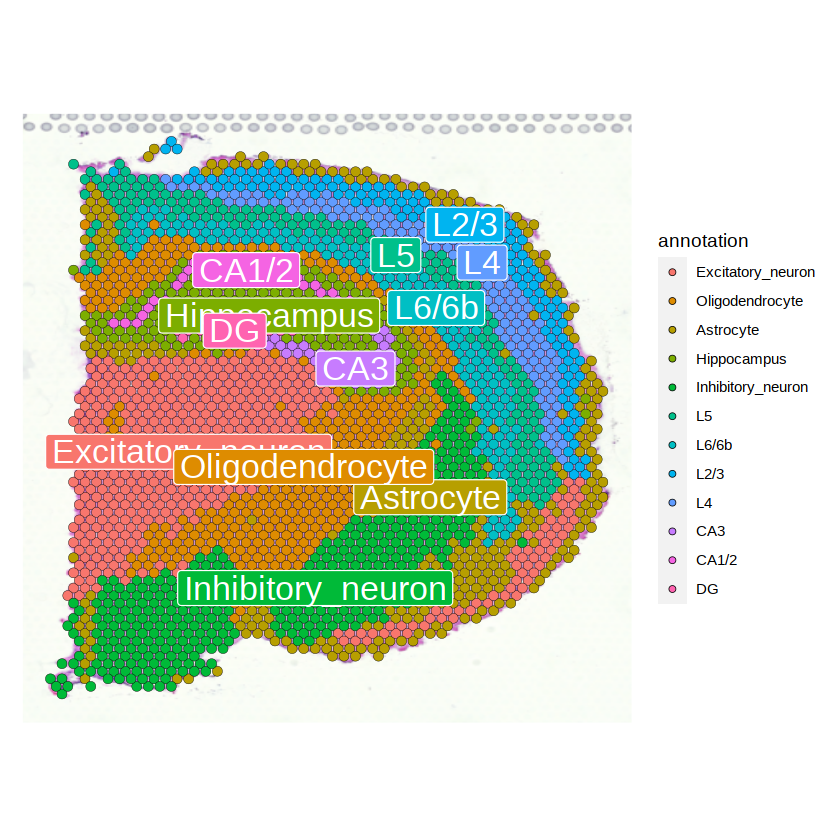

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



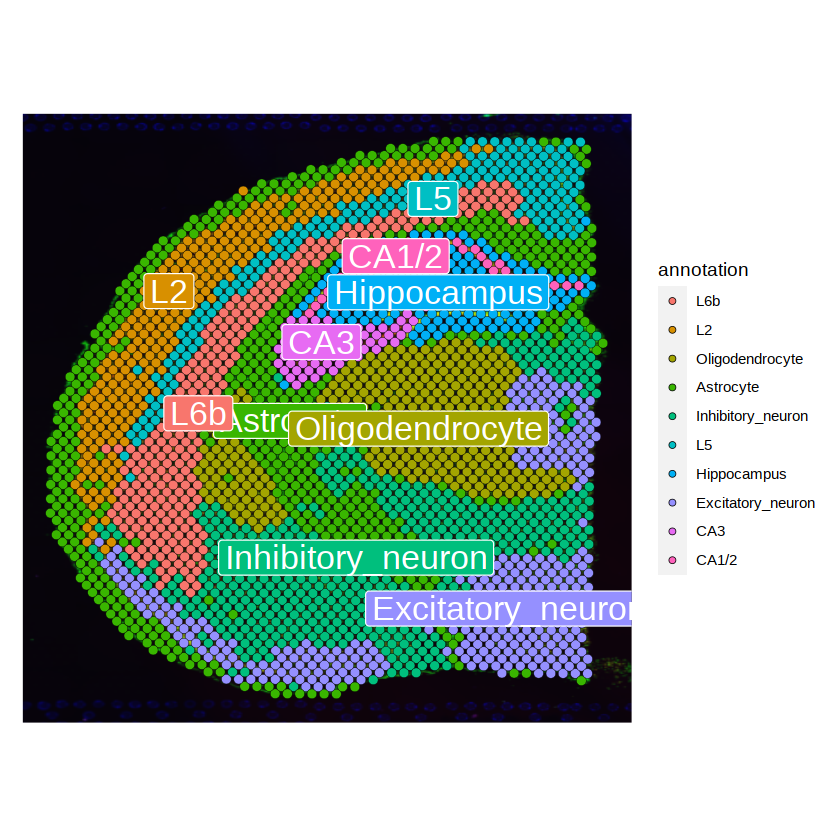

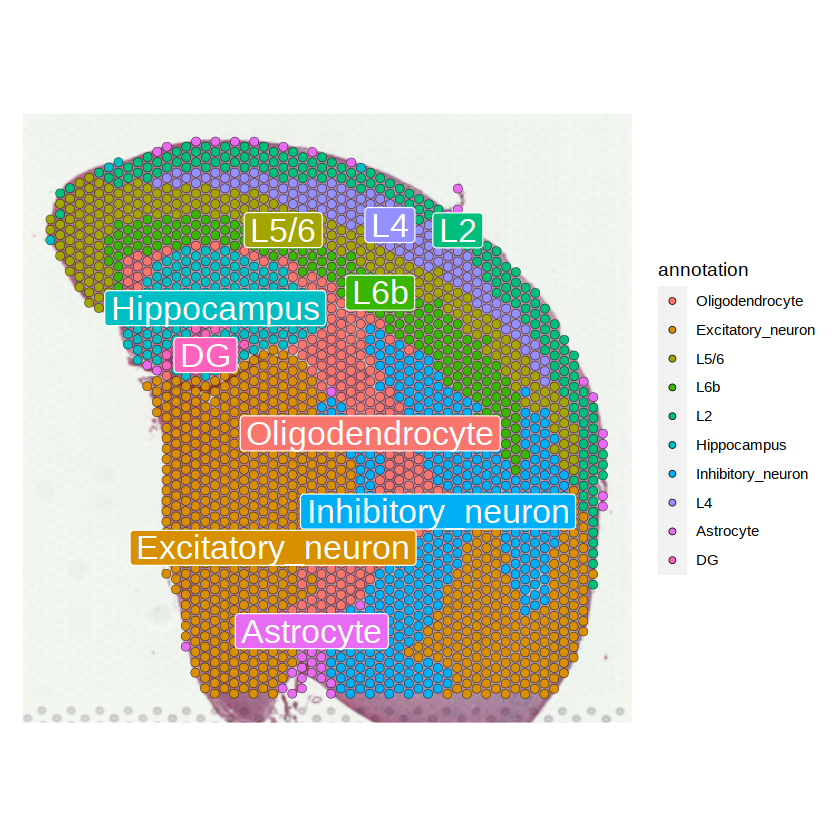

In [5]:
SpatialDimPlot(brain1,group.by="annotation",label=T)
SpatialDimPlot(brain2,group.by="annotation",label=T)
SpatialDimPlot(brain3,group.by="annotation",label=T)

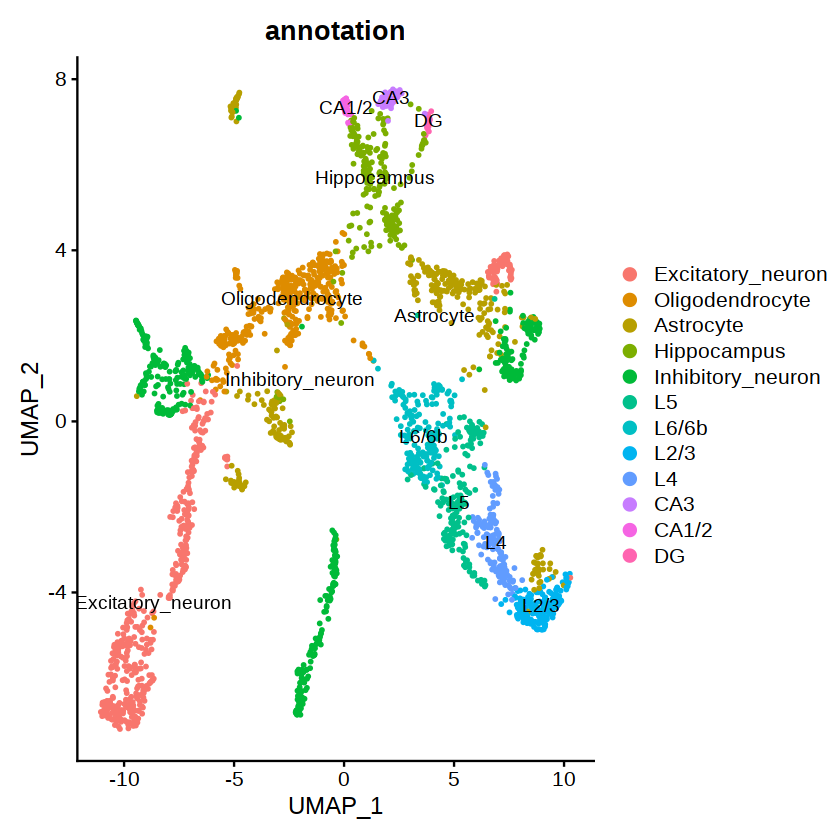

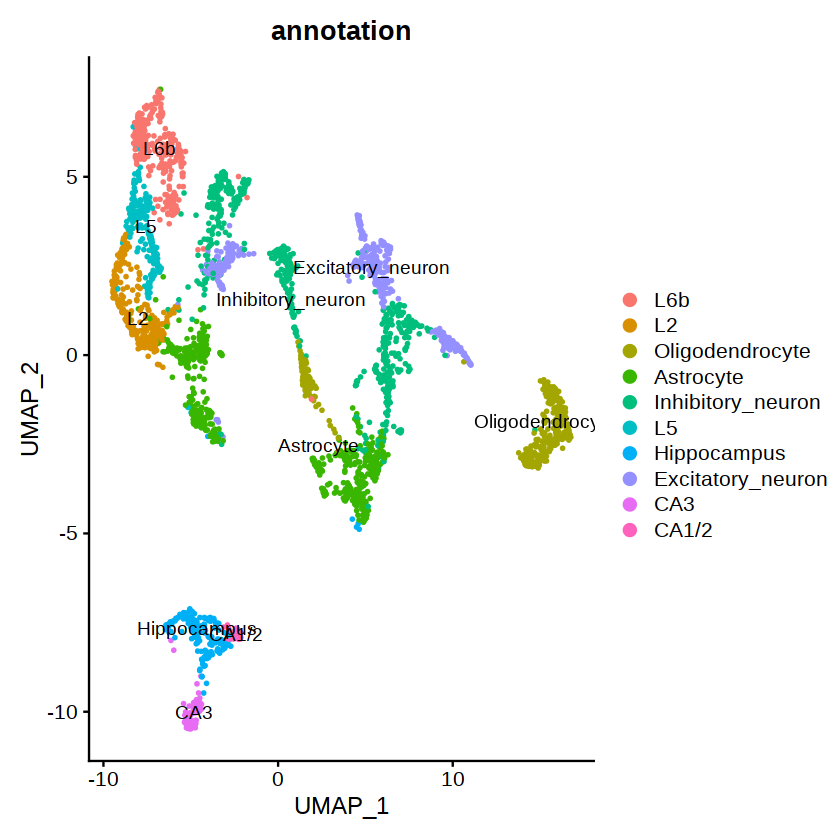

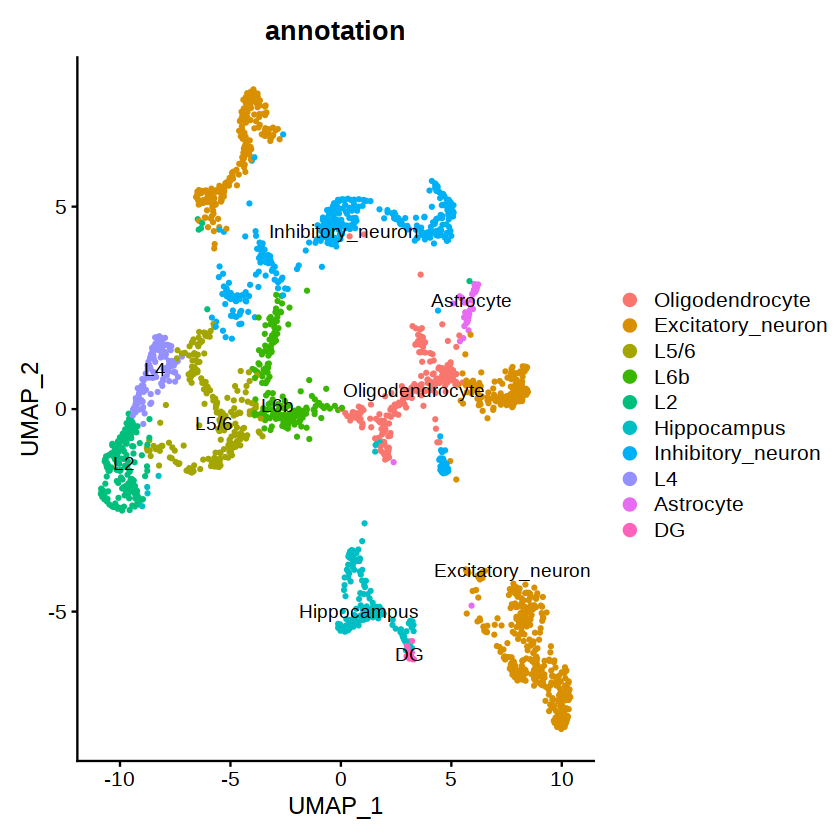

In [18]:
DimPlot(brain1,group.by="annotation",label=T)
DimPlot(brain2,group.by="annotation",label=T)
DimPlot(brain3,group.by="annotation",label=T)

In [17]:
########样本质量统计########
brain1$batch='10X_Normal'
brain2$batch='10X_DAPI'
brain3$batch='10X_FFPE'
brain=merge(brain1,y=c(brain2,brain3),add.cell.ids = c("10X_Normal", "10X_DAPI", "10X_FFPE"))
colors=data.frame(ggsci:::ggsci_db$"npg")[c(2,1,3),1]
png(paste(dirs,'fig/sample_quality_ncount.png',sep=""),width=1000,height=900,res=500)
p<-VlnPlot(brain, features=c("nCount_Spatial"),ncol=1,group.by="batch",cols=colors)+
xlab('')+ylab('SCS')+theme_bw()+
theme(axis.text.x=element_text(size=4, face="bold",colour = "black"),
      axis.text.y=element_text(size=4, face="bold",colour = "black"),
      axis.title.x=element_text(size=5,face="bold", colour = "black"),
#       axis.title.y=element_text(size=5, face="bold",colour = "black"),
      axis.title.y=element_blank(),
      plot.title=element_text(face="bold", size=5, colour = "black",hjust=0.5),
      legend.text=element_text(size=4, colour = "black",face="bold"),
      legend.title=element_blank(),
      panel.border = element_blank(),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      axis.line=element_line(size=0.3, colour = "black"),
      axis.ticks=element_line(size=0.3, colour = "black"),
     legend.position="None",
     legend.direction="vertical",
      legend.spacing.x = unit(0.05, 'cm'),
     legend.key.size = unit(0.1, 'cm'), 
     legend.key.height = unit(0.1, 'cm'),
     legend.key.width = unit(0.1, 'cm'),
     legend.box.margin=margin(-10,-10,-10,-10),
     strip.text = element_text(size = 5,face="bold",colour = "black"),
    strip.background=element_blank())+
guides(fill=guide_legend(nrow=1,byrow=TRUE))
print(p)
dev.off()

[1] "L2/3"  "L4"    "L6/6b" "DG"

[1] Excitatory_neuron L4                L6b               L2               
 [5] Inhibitory_neuron Astrocyte         DG                Hippocampus      
 [9] Oligodendrocyte   L5/6             
10 Levels: Oligodendrocyte Excitatory_neuron L5/6 L6b L2 ... DG

other methods

In [64]:
samples=c("10X_Normal","10X_DAPI","10X_FFPE")
count=read.csv(paste(dirs,"gtt_input/",samples[1],"_mat.csv",sep=""),header=T,row.names=1,sep=',')
meta=read.csv(paste(dirs,"gtt_input/",samples[1],"_meta.csv",sep=""),header=T,row.names=1,sep=',')
flags=paste("_",samples[1],sep="")
for(i in 2:length(samples)){
    count=rbind(count,read.csv(paste(dirs,"gtt_input/",samples[i],"_mat.csv",sep=""),header=T,row.names=1,sep=','))
    meta=rbind(meta,read.csv(paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""),header=T,row.names=1,sep=','))
    flags=paste(flags,"_",samples[i],sep="")
}
count=as(as.matrix(t(count)),'dgCMatrix')
# # # meta$region=meta$celltype
# # # meta$region[meta$celltype%in%c('L2/3','L5','L4','L6/6b','L2','L6b','L5/6')]='Cortex'
# # # meta$region[meta$celltype%in%c('Hippocampus','CA1/2','CA3','DG')]='Hippocampus'

# # # meta$celltype[meta$celltype=='L6/6b']='L6b'
# # # meta$celltype[meta$celltype=='L2']='L2/3'
# # # meta$celltype[meta$celltype=='L5']='L5/6'
# # # ub=unique(meta$batch)
# # # for(i in 1:length(ub)){
# # #     meta1=meta[meta$batch==ub[i],]
# # #     write.csv(meta1,(paste(dirs,"gtt_input/",ub[i],'_meta.csv',sep='')))
# # # }

In [65]:
ub=unique(meta$batch)
length(which(meta$batch==ub[1]))
length(which(meta$batch==ub[2]))
length(which(meta$batch==ub[3]))

[1] 2702

[1] 2903

[1] 2264

In [30]:
######seurat##########
dl<-CreateSeuratObject(counts=count,min.cells=0, min.features=0,meta.data=meta)
VariableFeatures(dl)<-rownames(dl)
dl@assays$RNA@scale.data=as.matrix(count)
# # dl<-ScaleData(dl)
# dl<-RunPCA(dl,npcs=30)
# dl<-RunUMAP(dl,reduction='pca',dims=1:30)
# DimPlot(dl,group.by='batch',label=T)
dl.list<-SplitObject(dl, split.by = "batch")
# features<-SelectIntegrationFeatures(object.list=dl.list)
features<-rownames(dl)
obj.anchors<-FindIntegrationAnchors(object.list = dl.list, anchor.features = features)
obj.inte<-IntegrateData(anchorset=obj.anchors,dims=1:30,verbose=F,k.weight=100)
# obj.inte<-ScaleData(obj.inte,verbose=F)
obj.inte@assays$integrated@scale.data=as.matrix(obj.inte@assays$integrated@data)
obj.inte<-RunPCA(obj.inte,npcs=30,verbose=F)
# obj.inte<-RunUMAP(obj.inte,reduction="pca",dims=1:30,verbose=F)
# DimPlot(obj.inte,group.by="batch",label=T)
# DimPlot(obj.inte,group.by="celltype",label=T)
x=as.data.frame(obj.inte@reductions$pca@cell.embeddings)
x=x[rownames(meta),]
write.csv(x,paste(dirs,"methods/seurat_mat",flags,".txt",sep=""))

x=as.data.frame(obj.inte@assays$integrated@data)
x=x[,rownames(meta)]
write.csv(t(x),paste(dirs,"methods/seurat_expression",flags,".txt",sep=""))

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5978 anchors

Filtering anchors

	Retained 4911 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5046 anchors

Filtering anchors

	Retained 4292 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5079 anchors

Filtering anchors

	Retained 4436 anchors



ERROR: Error: Unable to find a DimReduc matching one of 'umap', 'tsne', or 'pca', please specify a dimensional reduction to use


In [44]:
library(harmony)
#######harmony########
obj<-CreateSeuratObject(count=count,meta.data=meta)
obj@assays$RNA@scale.data=as.matrix(count)
VariableFeatures(obj)<-rownames(obj)
obj<-RunPCA(obj,npcs=30,features=rownames(obj))
obj.inte1 <- RunHarmony(obj, "batch",theta=2)
# obj.inte1 <-RunUMAP(obj.inte1, reduction = "harmony",dims=1:30)
# DimPlot(obj.inte1,group.by="batch")
# DimPlot(obj.inte1,group.by="celltype")
x=as.data.frame(obj.inte1@reductions$harmony@cell.embeddings)
x=x[rownames(meta),]
write.csv(x,paste(dirs,"methods/harmony_mat",flags,".txt",sep=""))
######harmony+sedr#####
# embed2=read.csv(paste(dirs,"methods/SEDR_mat",flags,".csv",sep=""),header=T,row.names=1)
# embed2=embed2[colnames(count),]
# obj[['SEDR']]<-CreateDimReducObject(embeddings=as.matrix(embed2), key = "SEDR_", assay = DefaultAssay(obj))
# obj.inte2 <- RunHarmony(obj, "batch",theta=2,reduction='SEDR')
# obj.inte2 <-RunUMAP(obj.inte2, reduction = "harmony",dims=1:dim(embed2)[2])
# DimPlot(obj.inte2,group.by="batch")
# DimPlot(obj.inte2,group.by="celltype")
# x=as.data.frame(obj.inte2@reductions$harmony@cell.embeddings)
# x=x[rownames(meta),]
# write.csv(x,paste(dirs,"methods/harmony_SEDR_mat",flags,".txt",sep=""))
# ######stagate+harmony#####
# embed3=read.csv(paste(dirs,"methods/STAGATE_mat",flags,".csv",sep=""),header=T,row.names=1)
# embed3=embed3[colnames(count),]
# obj[['STAGATE']]<-CreateDimReducObject(embeddings=as.matrix(embed3), key = "STAGATE_", assay = DefaultAssay(obj))
# obj.inte3 <- RunHarmony(obj, "batch",theta=2,reduction='STAGATE')
# obj.inte3 <-RunUMAP(obj.inte3, reduction = "harmony",dims=1:dim(embed3)[2])
# DimPlot(obj.inte3,group.by="batch")
# DimPlot(obj.inte3,group.by="celltype")
# x=as.data.frame(obj.inte3@reductions$harmony@cell.embeddings)
# x=x[rownames(meta),]
# write.csv(x,paste(dirs,"methods/harmony_STAGATE_mat",flags,".txt",sep=""))

PC_ 1 
Positive:  Hesx1, Fxyd4, Irx4, Olfr1508, Sprr2i, Svs4, Tpsab1, Apol10a, Cxcr1, Adamdec1 
	   Trim31, Adh6b, Nanog, Defb50, Zscan10, Tmem45b, Vwa2, Kel, Cpa3, Olfr286 
	   Htr3b, Foxn1, Tpsg1, Clec4b1, Asb12, Traj34, Slc1a7, Btnl9, Hemgn, Ctse 
Negative:  Fth1, Tmsb4x, Mbp, Calm1, Snap25, Camk2n1, Atp1b1, Eef1a1, Calm2, Aldoa 
	   Selenow, Plp1, Pcsk1n, Rtn1, Olfm1, Atp6v0c, Uchl1, Ndrg4, Gpm6a, Hsp90aa1 
	   Actb, Stmn3, Mdh1, Ncdn, Ppp3ca, Nrgn, Ywhaz, Gapdh, Prnp, Ywhah 
PC_ 2 
Positive:  Sept5, Syngap1, Slc17a7, Ptprn2, Arpp21, Nell2, Psd, Kalrn, Gabrb2, Egr1 
	   Arc, Pcdhgc5, Rgs4, Kctd16, Camkk2, Cadm3, Camk4, Fam81a, Rims1, Ngef 
	   Nrn1, Grin2b, Rph3a, Gas7, Hpca, Shank3, Fgf12, Camk2n1, Bsn, Cdk5r2 
Negative:  Gapdh, Ubb, Chchd2, Ptgds, Tuba1b, Hbb.bs, Plp1, Snrpn, Fth1, Mbp 
	   Stmn1, Atp5g1, Ndufb4, Chchd10, Atp5f1, Ttr, Cox7b, Pebp1, Eef1a1, Atp5l 
	   H3f3a, Hint1, Hsp90aa1, Actb, Sparc, Dbi, Hbb.bt, Mal, Trf, Uqcrb 
PC_ 3 
Positive:  Plp1, Mobp, Mbp, Cnp, Mal, Pl

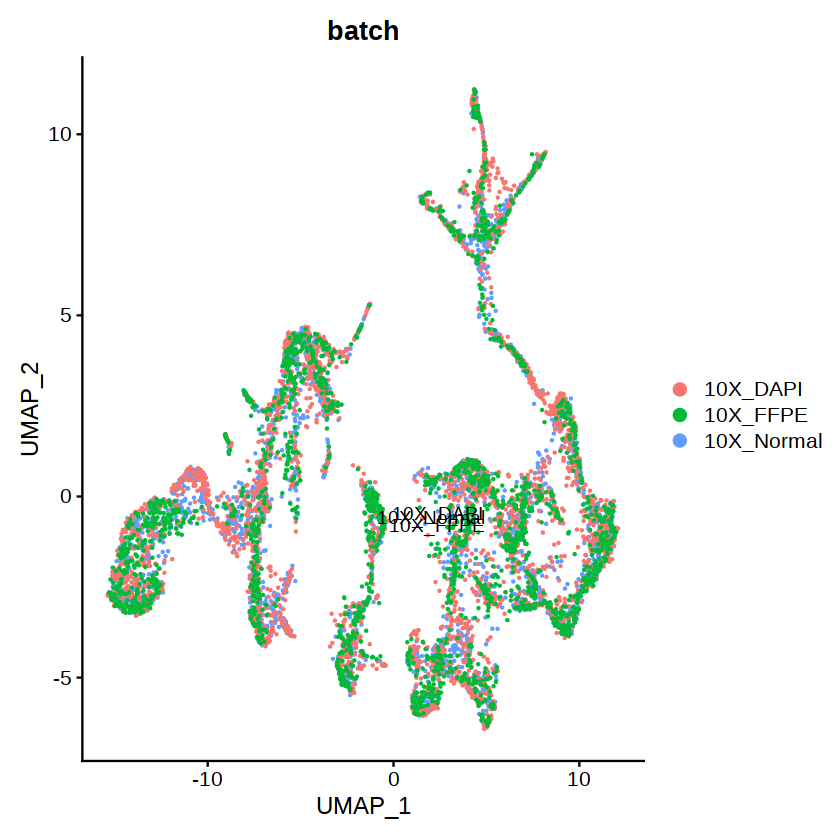

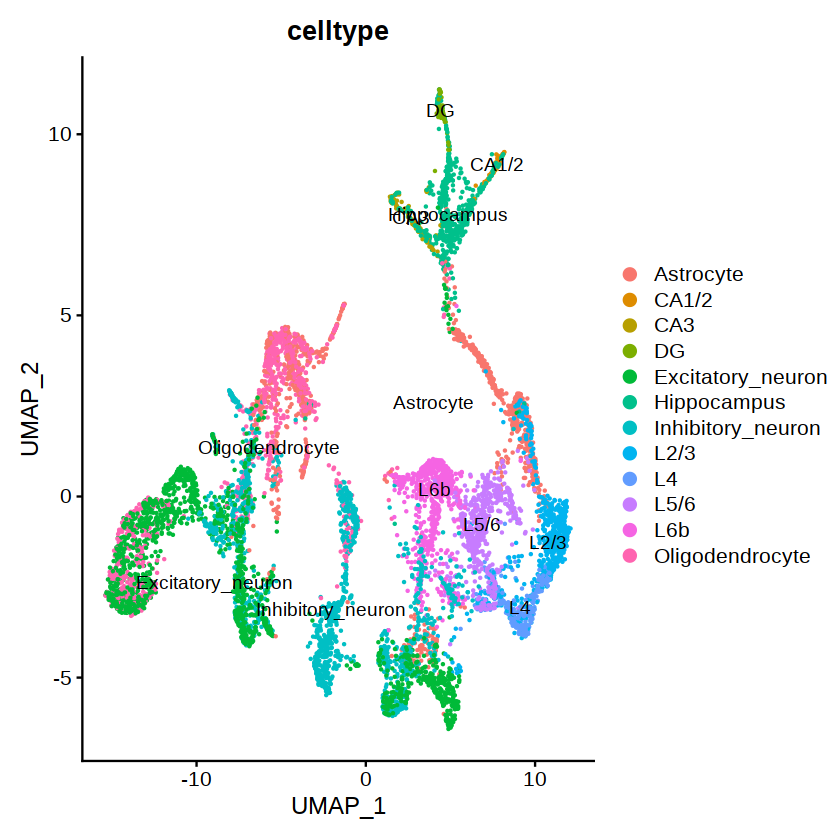

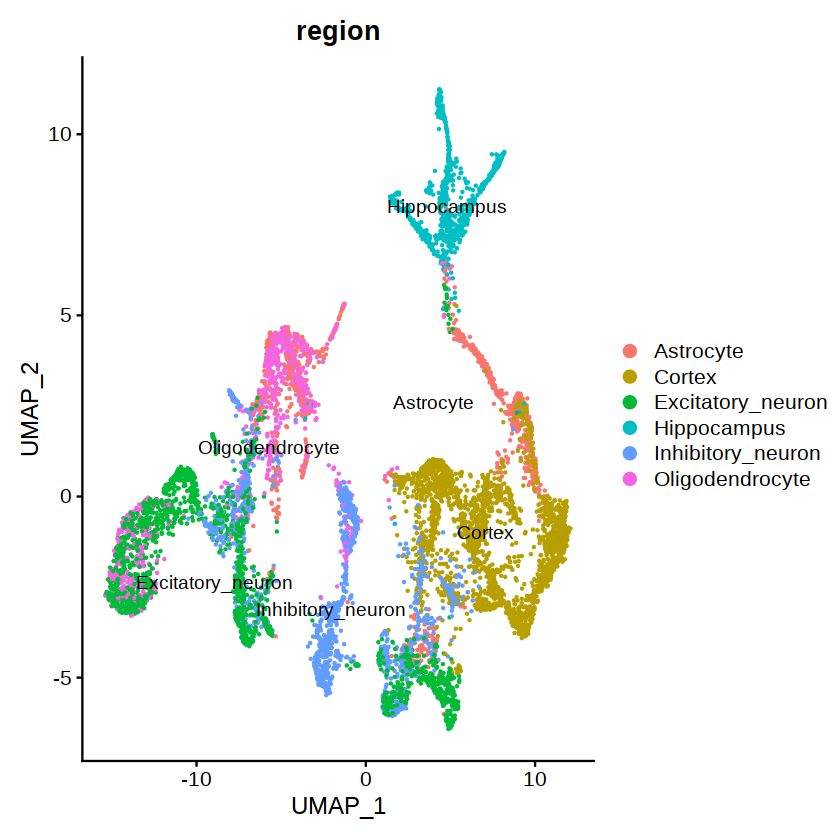

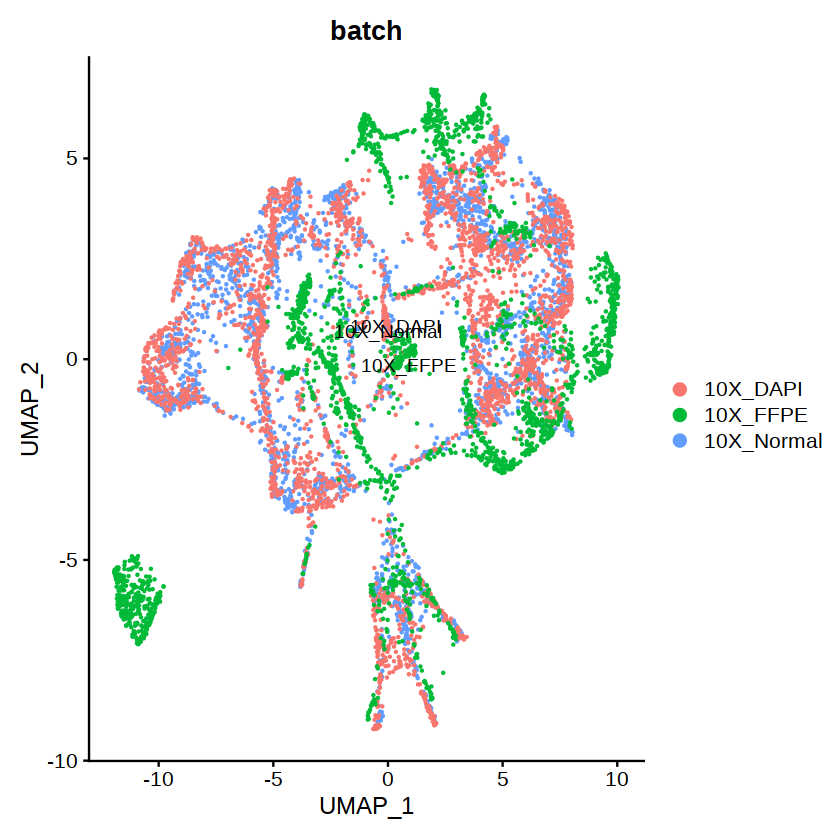

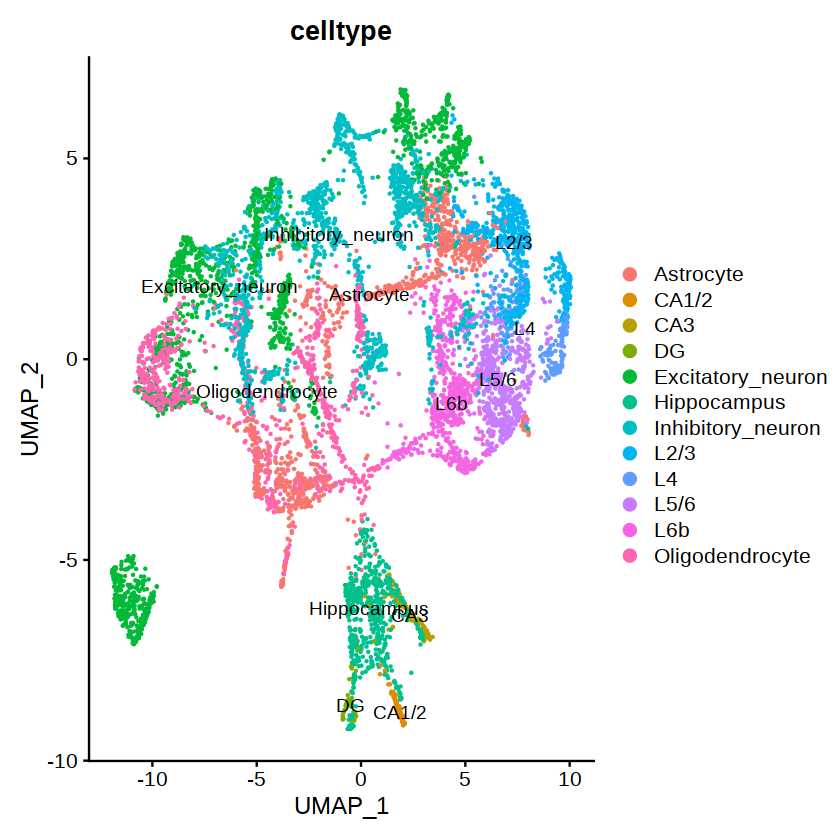

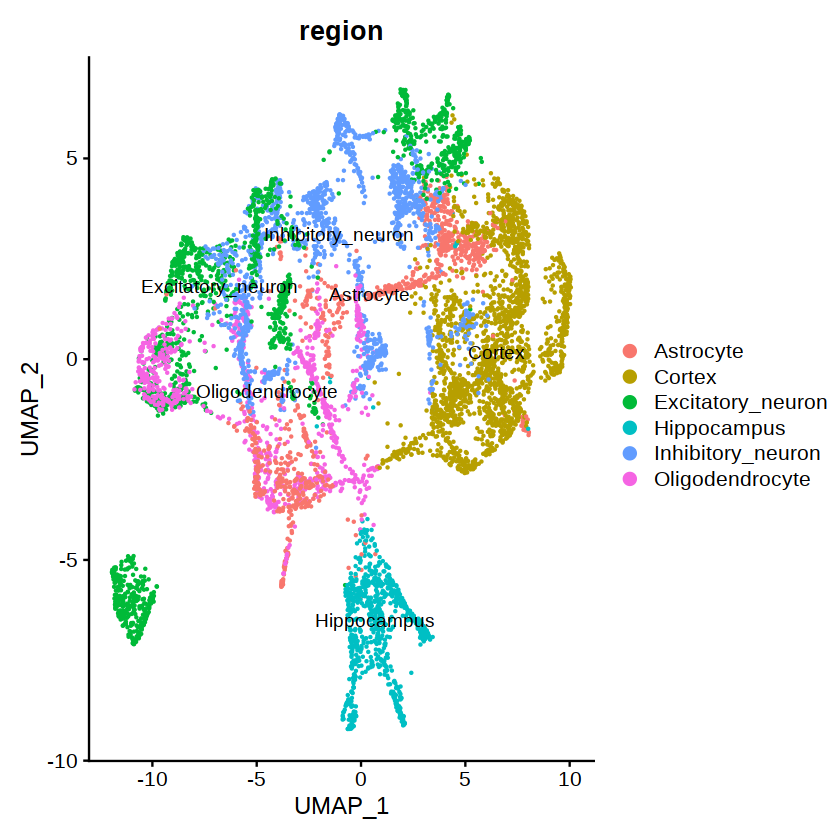

In [21]:
DimPlot(obj.inte,group.by="batch",label=T)
DimPlot(obj.inte,group.by="celltype",label=T)
DimPlot(obj.inte,group.by="region",label=T)
DimPlot(obj.inte1,group.by="batch",label=T)
DimPlot(obj.inte1,group.by="celltype",label=T)
DimPlot(obj.inte1,group.by="region",label=T)

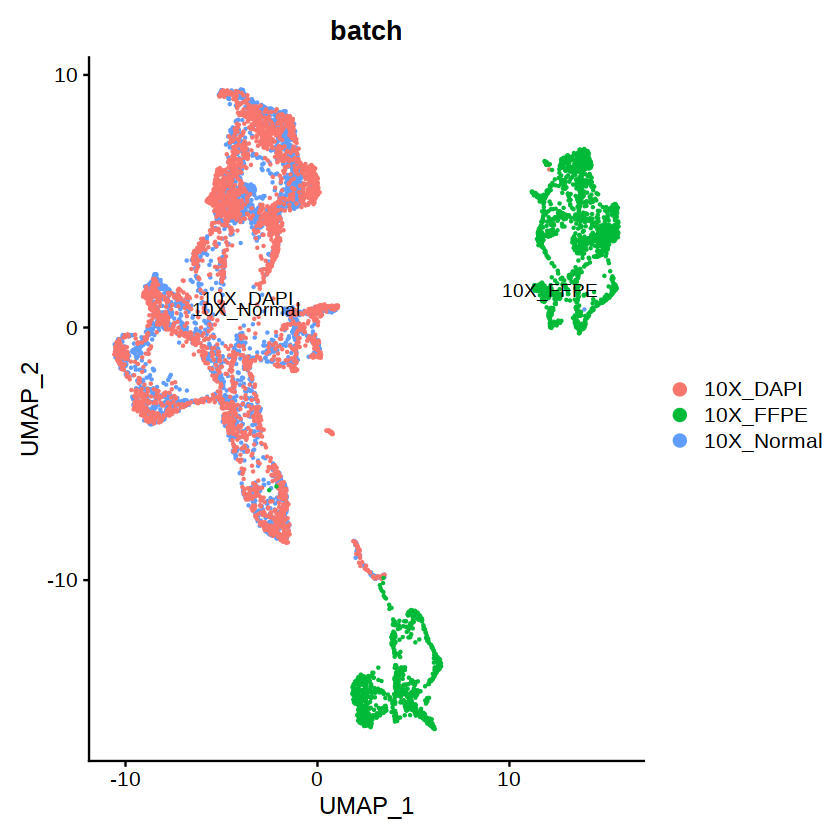

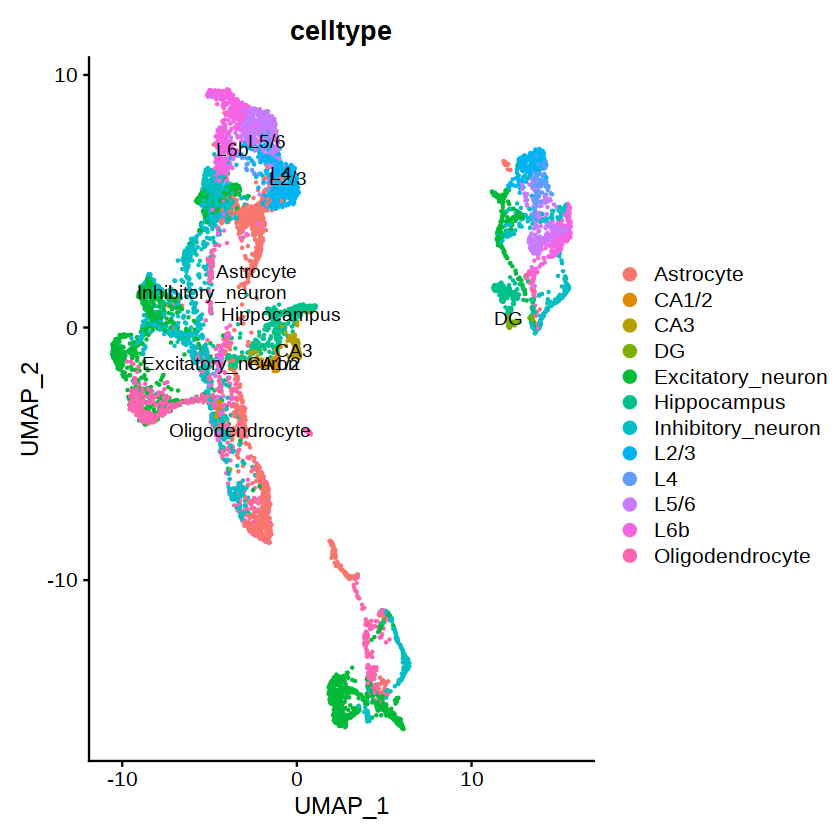

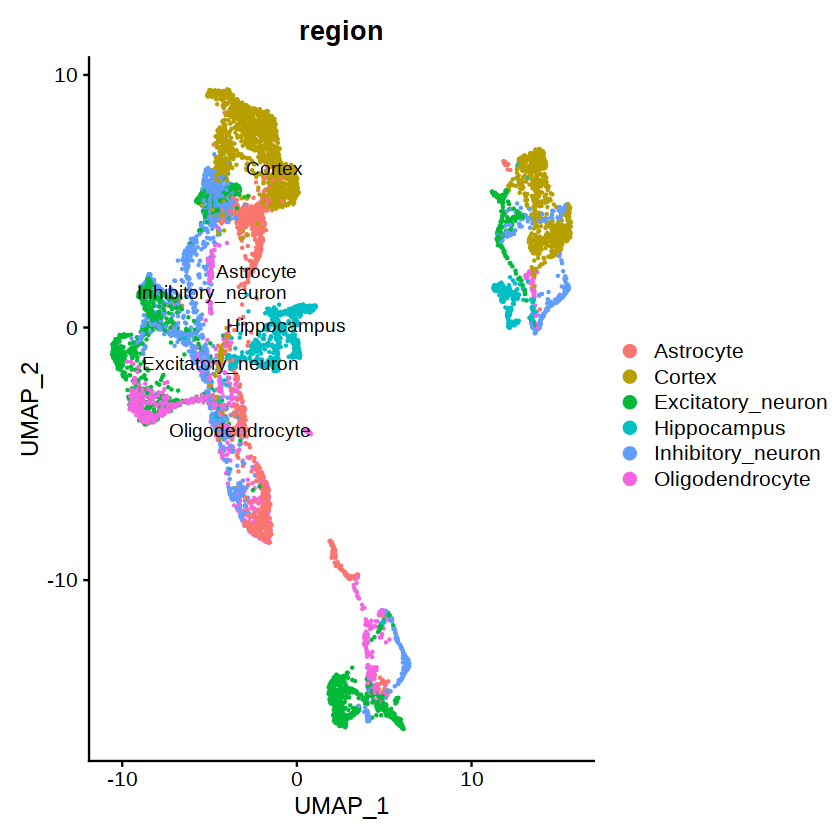

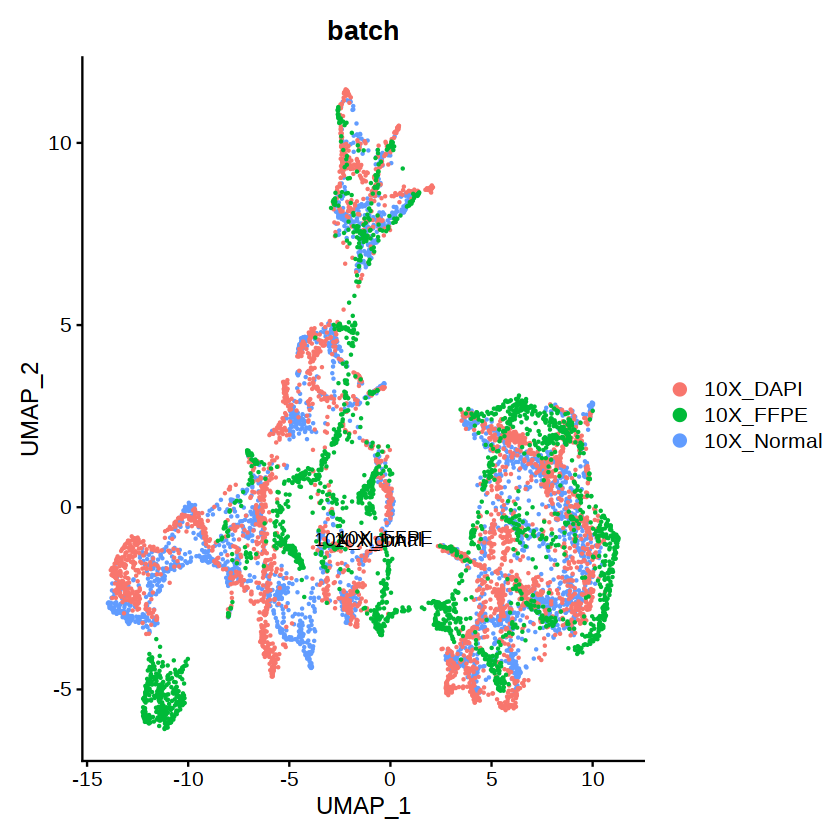

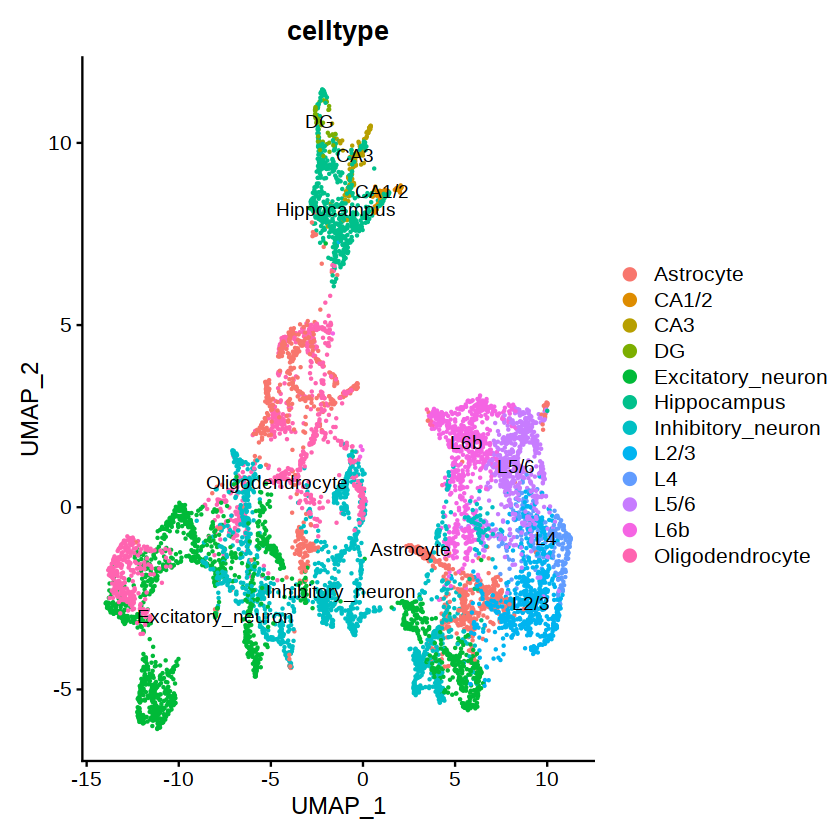

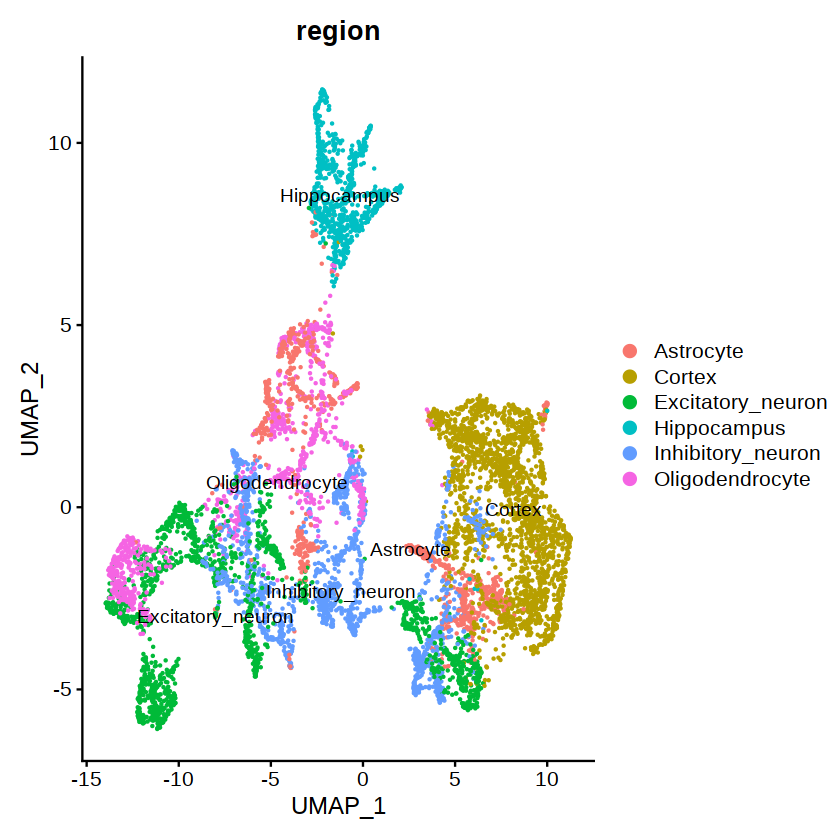

In [22]:
DimPlot(obj.inte2,group.by="batch",label=T)
DimPlot(obj.inte2,group.by="celltype",label=T)
DimPlot(obj.inte2,group.by="region",label=T)
DimPlot(obj.inte3,group.by="batch",label=T)
DimPlot(obj.inte3,group.by="celltype",label=T)
DimPlot(obj.inte3,group.by="region",label=T)

downstream analysis

In [2]:
samples=c("10X_Normal","10X_DAPI","10X_FFPE")
count=read.csv(paste(dirs,"gtt_input/",samples[1],"_mat.csv",sep=""),header=T,row.names=1,sep=',')
meta=read.csv(paste(dirs,"gtt_input/",samples[1],"_meta.csv",sep=""),header=T,row.names=1,sep=',')
coord=read.csv(paste(dirs,"gtt_input/",samples[1],"_coord.csv",sep=""),header=T,row.names=1,sep=',')
flags=paste("_",samples[1],sep="")
for(i in 2:length(samples)){
    count=rbind(count,read.csv(paste(dirs,"gtt_input/",samples[i],"_mat.csv",sep=""),header=T,row.names=1,sep=','))
    meta=rbind(meta,read.csv(paste(dirs,"gtt_input/",samples[i],"_meta.csv",sep=""),header=T,row.names=1,sep=','))
    flags=paste(flags,"_",samples[i],sep="")
    coord=rbind(coord,read.csv(paste(dirs,"gtt_input/",samples[i],"_coord.csv",sep=""),header=T,row.names=1,sep=','))
}
count=as(as.matrix(t(count)),'dgCMatrix')
obj<-CreateSeuratObject(counts=count,min.cells=0, min.features=0,meta.data=meta)
VariableFeatures(obj)<-rownames(obj)
obj@assays$RNA@scale.data=as.matrix(count)
# obj<-ScaleData(obj)
# obj<-RunPCA(obj,npcs=50)
# obj<-RunUMAP(obj,reduction='pca',dims=1:50)
obj@images$image<-new(
    Class = 'SlideSeq',
    assay = "Spatial",
    key = "image_",
    coordinates = coord
)

In [3]:
# embed1=read.csv(paste(dirs,"gtt_output/AGC_embed",flags,"_xent.csv",sep=""),header=T,row.names=1)
embed1=read.csv(paste(dirs,"gtt_output/SPIRAL",flags,"_embed_256",".csv",sep=""),header=T,row.names=1)
if(dim(embed1)[2]==16){
    znoise_dim=3}else{
    znoise_dim=5
}
embed1=embed1[colnames(count),znoise_dim:dim(embed1)[2]]
obj[['GTT']]<-CreateDimReducObject(embeddings=as.matrix(embed1), key = "GTT_", assay = DefaultAssay(obj))
obj <-RunUMAP(obj, reduction = "GTT",dims=1:dim(embed1)[2],reduction.name="GTT.umap")
embed2=read.csv(paste(dirs,"methods/seurat_mat",flags,".txt",sep=""),header=T,row.names=1)
embed2=embed2[colnames(count),]
obj[['Seurat']]<-CreateDimReducObject(embeddings=as.matrix(embed2), key = "Seurat_", assay = DefaultAssay(obj))
embed3=read.csv(paste(dirs,"methods/harmony_mat",flags,".txt",sep=""),header=T,row.names=1)
embed3=embed3[colnames(count),]
obj[['Harmony']]<-CreateDimReducObject(embeddings=as.matrix(embed3), key = "Harmony_", assay = DefaultAssay(obj))
embed4=read.csv(paste(dirs,"methods/harmony_SEDR_mat",flags,".txt",sep=""),header=T,row.names=1)
embed4=embed4[colnames(count),]
obj[['SEDR']]<-CreateDimReducObject(embeddings=as.matrix(embed4), key = "SEDR_", assay = DefaultAssay(obj))
embed5=read.csv(paste(dirs,"methods/harmony_STAGATE_mat",flags,".txt",sep=""),header=T,row.names=1)
embed5=embed5[colnames(count),]
obj[['STAGATE']]<-CreateDimReducObject(embeddings=as.matrix(embed5), key = "STAGATE_", assay = DefaultAssay(obj))

obj <-RunUMAP(obj, reduction = "Seurat",dims=1:dim(embed2)[2],reduction.name="Seurat.umap")
obj <-RunUMAP(obj, reduction = "Harmony",dims=1:dim(embed3)[2],reduction.name="Harmony.umap")
obj <-RunUMAP(obj, reduction = "SEDR",dims=1:dim(embed4)[2],reduction.name="SEDR.umap")
obj <-RunUMAP(obj, reduction = "STAGATE",dims=1:dim(embed5)[2],reduction.name="STAGATE.umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:46:55 UMAP embedding parameters a = 0.9922 b = 1.112

20:46:55 Read 7869 rows and found 24 numeric columns

20:46:55 Using Annoy for neighbor search, n_neighbors = 30

20:46:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:46:57 Writing NN index file to temp file /tmp/Rtmpx3YAp6/file658e165b90d0

20:46:57 Searching Annoy index using 1 thread, search_k = 3000

20:47:00 Annoy recall = 100%

20:47:00 Commencing smooth kNN distance calibration using 1 thread

20:47:01 Initializing fro

In [13]:
res=0.8
res1=0.8
obj<-FindNeighbors(obj, dims=1:dim(embed1)[2],reduction="GTT")
obj<-FindClusters(obj, resolution =res1)
obj$gtt=obj$seurat_clusters
# obj<-FindNeighbors(obj, dims=1:dim(embed2)[2],reduction="Seurat")
# obj<-FindClusters(obj, resolution = res)
# obj$seurat=obj$seurat_clusters
# obj<-FindNeighbors(obj, dims=1:dim(embed3)[2],reduction="Harmony")
# obj<-FindClusters(obj, resolution = res)
# obj$harmony=obj$seurat_clusters
# obj<-FindNeighbors(obj, dims=1:dim(embed4)[2],reduction="SEDR")
# obj<-FindClusters(obj, resolution =res)
# obj$sedr=obj$seurat_clusters
# obj<-FindNeighbors(obj, dims=1:dim(embed5)[2],reduction="STAGATE")
# obj<-FindClusters(obj, resolution =res)
# obj$stagate=obj$seurat_clusters

# write.csv(as.data.frame(obj$seurat),paste(dirs,'metrics/seurat_louvain_clust',flags,'.csv',sep=""))
# write.csv(as.data.frame(obj$harmony),paste(dirs,'metrics/harmony_louvain_clust',flags,'.csv',sep=""))
# write.csv(as.data.frame(obj$sedr),paste(dirs,'metrics/SEDR_louvain_clust',flags,'.csv',sep=""))
# write.csv(as.data.frame(obj$stagate),paste(dirs,'metrics/STAGATE_louvain_clust',flags,'.csv',sep=""))
# a<-read.csv(paste(dirs,'metrics/louvain_clust',flags,'.csv',sep=""),header=T,row.names=1)
# obj$gtt1=a[colnames(obj@assays$RNA@data),1]


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7869
Number of edges: 307810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 21
Elapsed time: 0 seconds


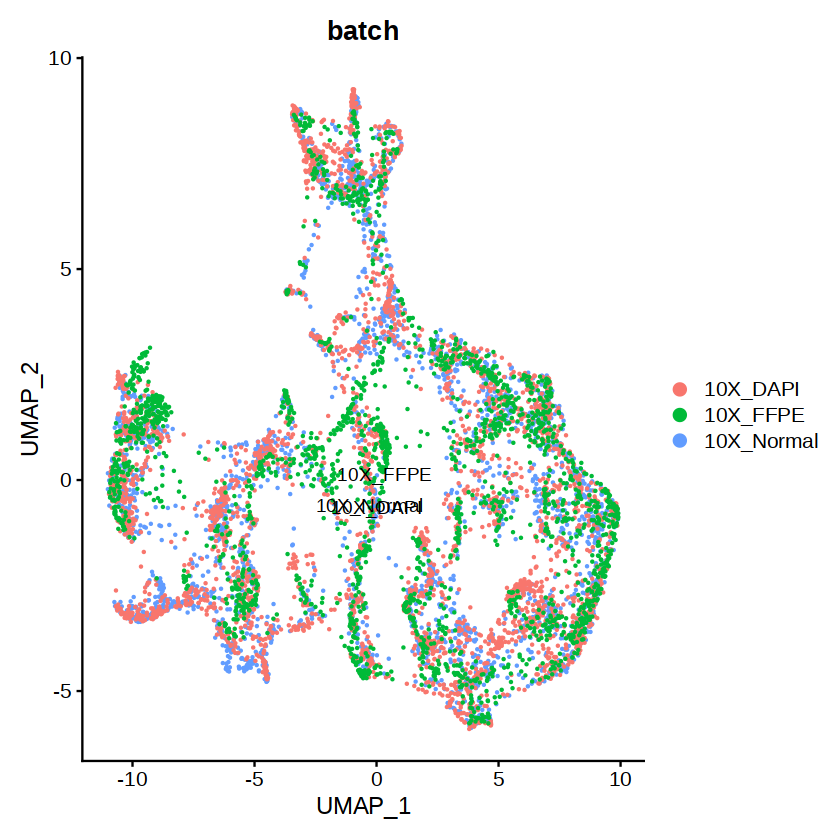

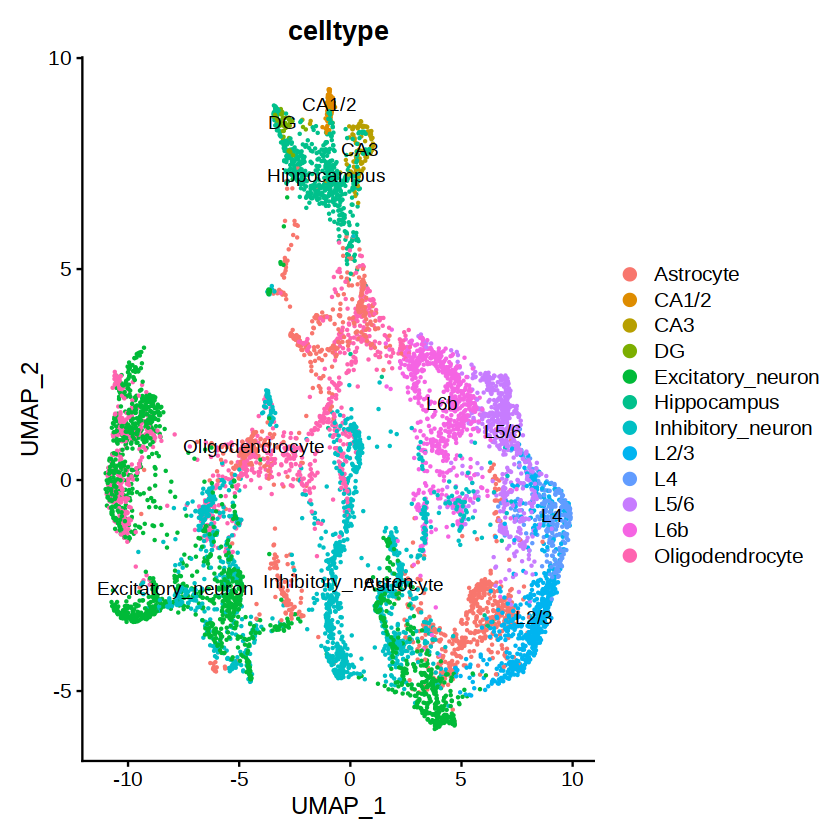

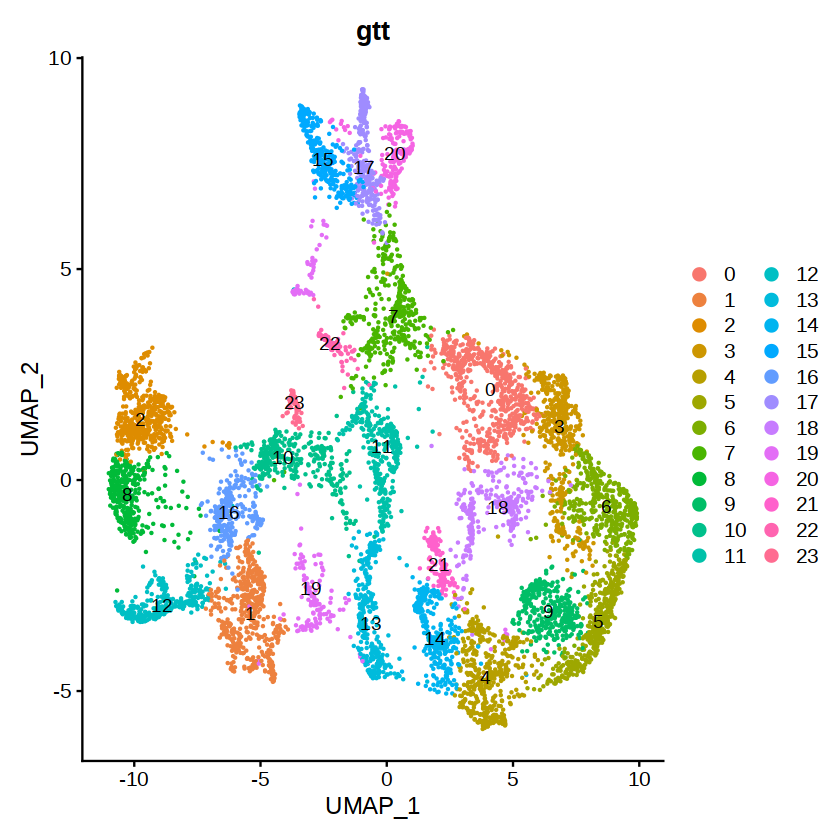

In [9]:
DimPlot(obj,group.by="batch",label=T,reduction='GTT.umap')
DimPlot(obj,group.by="celltype",label=T,reduction='GTT.umap')
DimPlot(obj,group.by="gtt",label=T,reduction='GTT.umap')

# DimPlot(obj,group.by="batch",label=T,reduction='Seurat.umap')
# DimPlot(obj,group.by="celltype",label=T,reduction='Seurat.umap')
# DimPlot(obj,group.by="seurat",label=T,reduction='Seurat.umap')

# DimPlot(obj,group.by="batch",label=T,reduction='STAGATE.umap')
# DimPlot(obj,group.by="celltype",label=T,reduction='STAGATE.umap')
# DimPlot(obj,group.by="stagate",label=T,reduction='STAGATE.umap')

# DimPlot(obj,group.by="batch",label=T,reduction='SEDR.umap')
# DimPlot(obj,group.by="celltype",label=T,reduction='SEDR.umap')
# DimPlot(obj,group.by="sedr",label=T,reduction='SEDR.umap')

# DimPlot(obj,group.by="batch",label=T,reduction='Harmony.umap')
# DimPlot(obj,group.by="celltype",label=T,reduction='Harmony.umap')
# DimPlot(obj,group.by="harmony",label=T,reduction='Harmony.umap')

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from gtt.umap_ to gttumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from seurat.umap_ to seuratumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmony.umap_ to harmonyumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from sedr.umap_ to sedrumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stagate.umap_ to stagateumap_”
Warning message:
“Adding image data that isn't associated with any assay present”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 802
Number of edges: 32667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8474
Number of communities: 4
Elapsed time: 0 seconds


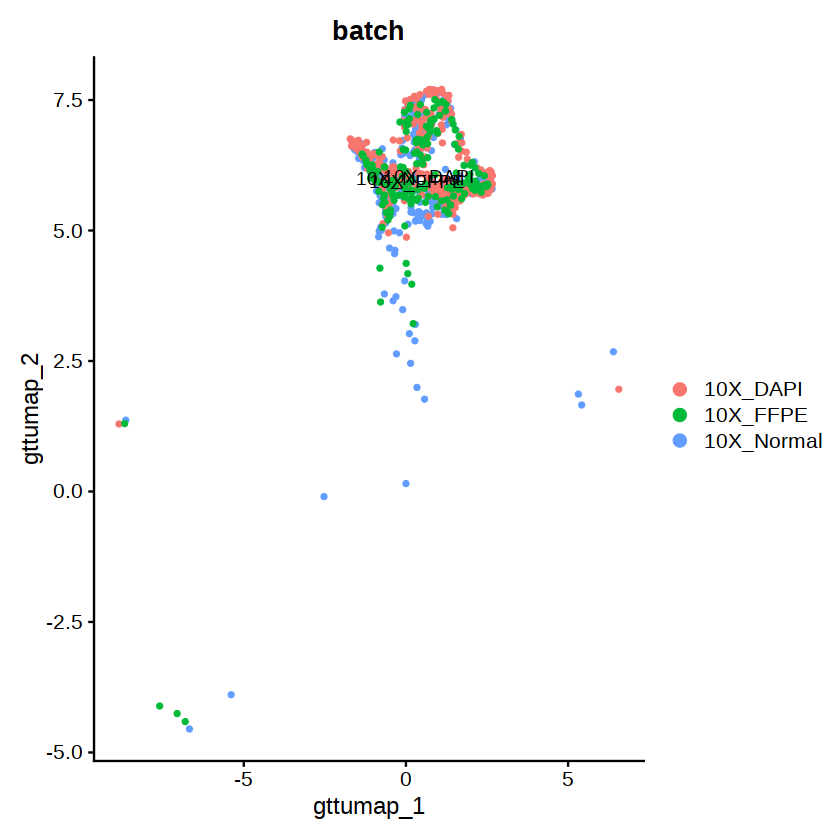

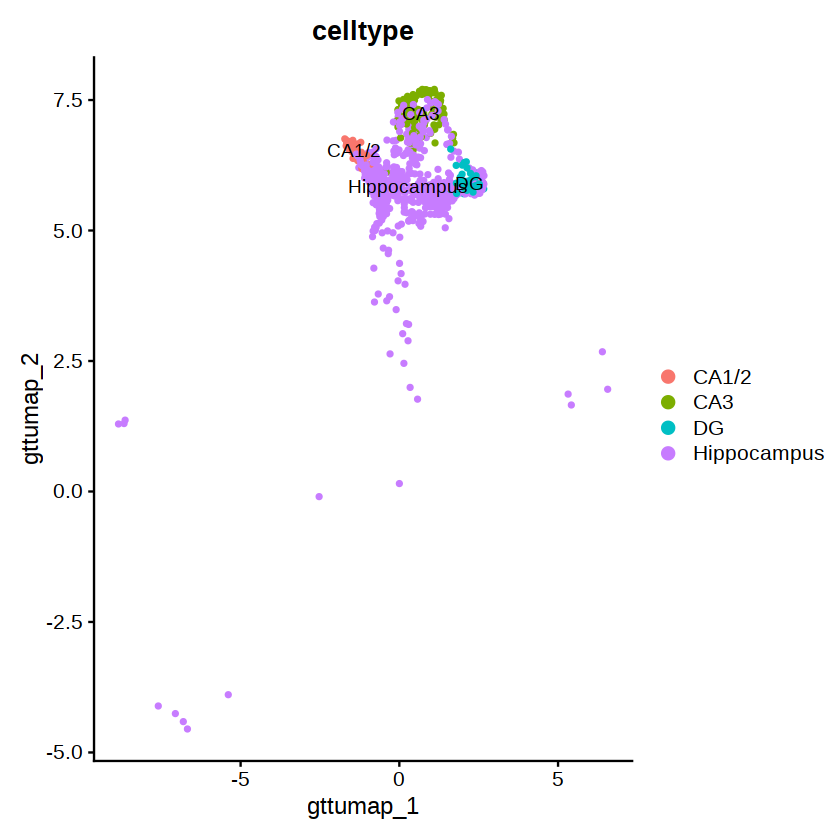

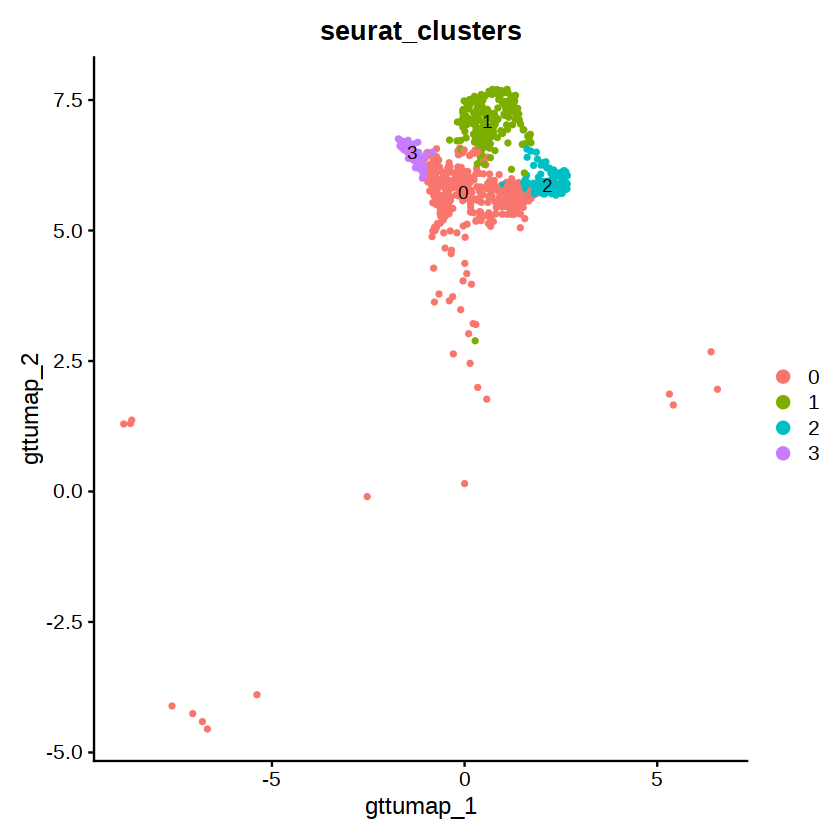

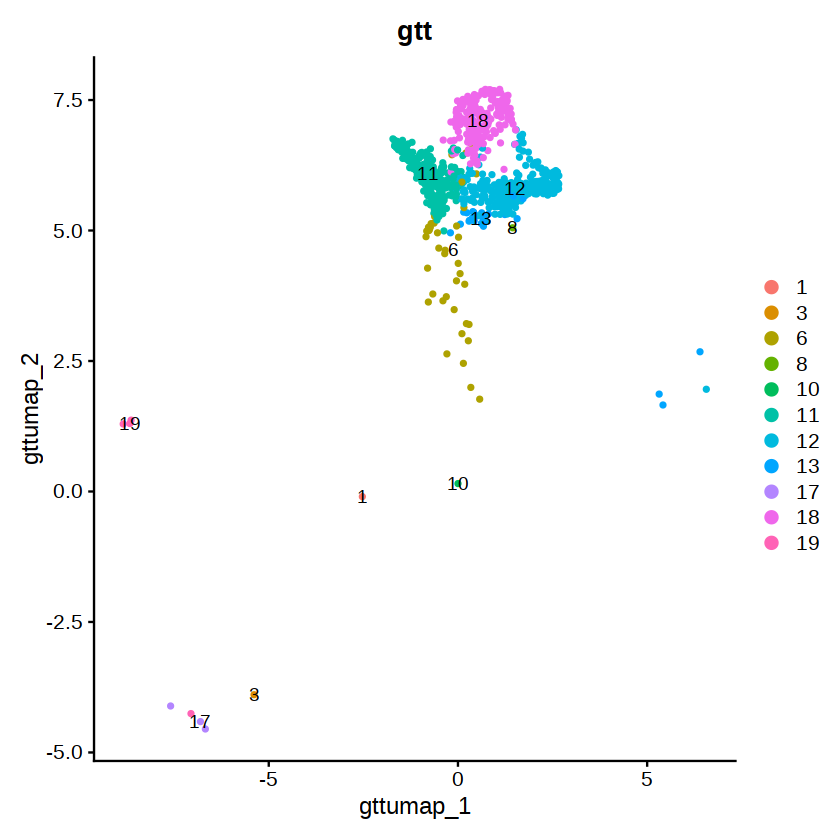

In [98]:
##########subset hippo region###########
obj.hippo<-subset(obj,subset=celltype%in%c('Hippocampus','CA1/2','CA3','DG'))
# obj.hippo<-subset(obj,subset=gtt%in%c('11','12','18'))
obj.hippo<-FindNeighbors(obj.hippo, dims=1:dim(embed1)[2],reduction="GTT")
obj.hippo<-FindClusters(obj.hippo, resolution = 0.3)
DimPlot(obj.hippo,group.by="batch",label=T,reduction='GTT.umap')
DimPlot(obj.hippo,group.by="celltype",label=T,reduction='GTT.umap')
DimPlot(obj.hippo,group.by="seurat_clusters",label=T,reduction='GTT.umap')
DimPlot(obj.hippo,group.by="gtt",label=T,reduction='GTT.umap')
obj.hippo$gtt=obj.hippo$seurat_clusters
# # `%!in%` <- Negate(`%in%`)
# # obj1<-subset(obj,subset=celltype  %!in% c('Hippocampus','CA1/2','CA3','DG'))
obj$new_gtt=as.character(obj$gtt)
obj$new_gtt[names(obj.hippo$gtt)[as.character(obj.hippo$gtt)=='0']]='11'
obj$new_gtt[names(obj.hippo$gtt)[as.character(obj.hippo$gtt)=='1']]='12'
obj$new_gtt[names(obj.hippo$gtt)[as.character(obj.hippo$gtt)=='2']]='18'
obj$new_gtt[names(obj.hippo$gtt)[as.character(obj.hippo$gtt)=='3']]='21'
a=data.frame(clusters=obj$new_gtt)
write.csv(a,paste(dirs,'metrics/louvain_clust',flags,'.csv',sep=""))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from gtt.umap_ to gttumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from seurat.umap_ to seuratumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmony.umap_ to harmonyumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from sedr.umap_ to sedrumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stagate.umap_ to stagateumap_”
Warning message:
“Adding image data that isn't associated with any assay present”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing sc

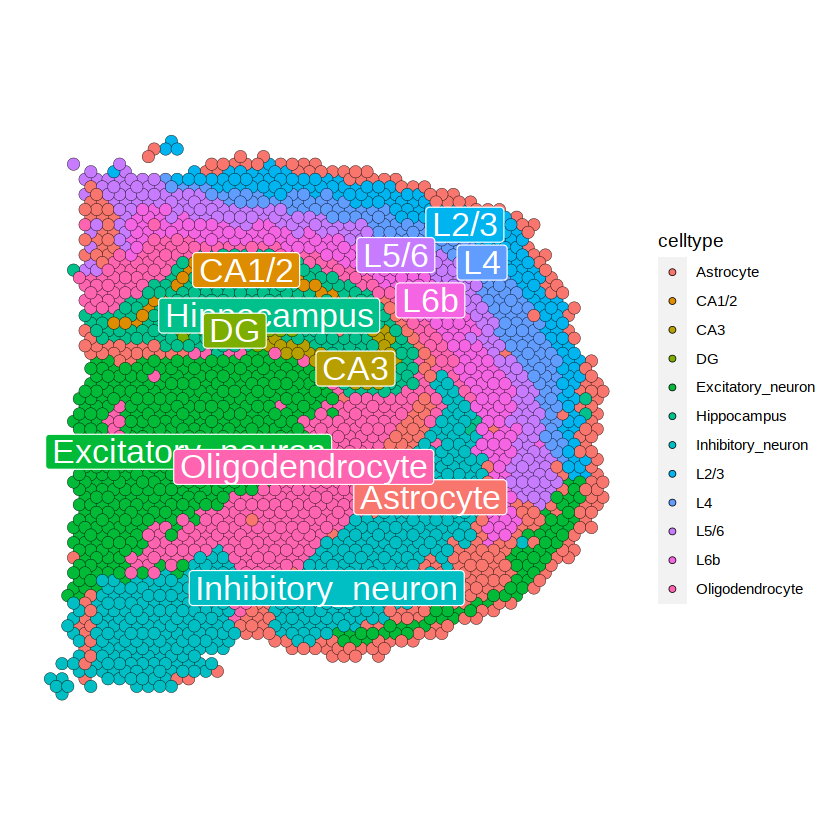

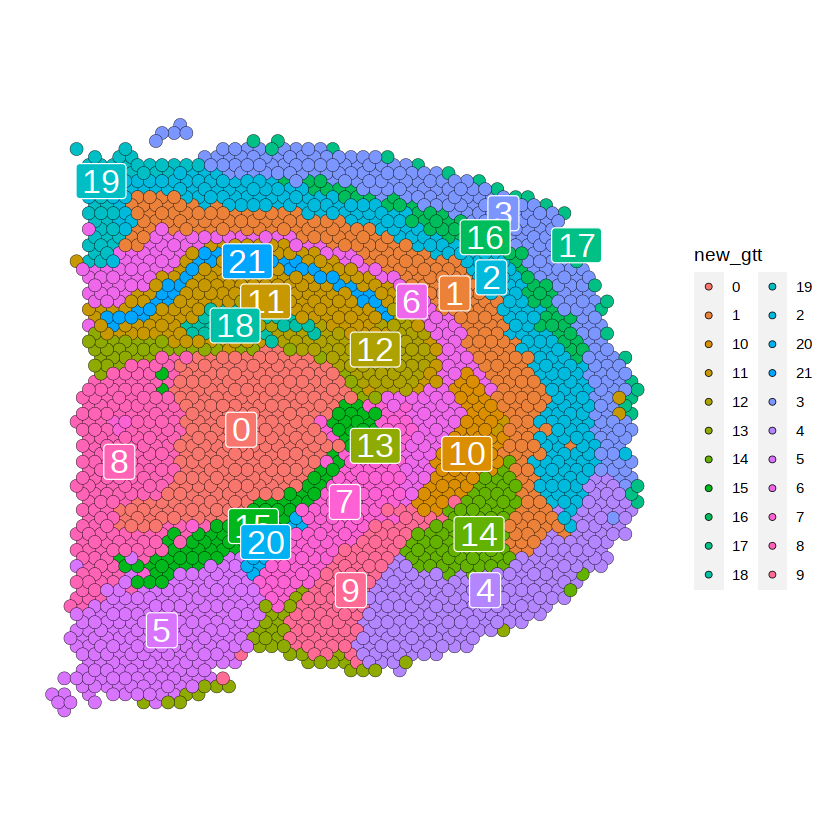

In [106]:
ub=unique(obj$batch)
obj1<-subset(obj,subset=batch==ub[1])
SpatialDimPlot(obj1,group.by="celltype",label=T,pt.size=5)
SpatialDimPlot(obj1,group.by="new_gtt",label=T,pt.size=5)
# SpatialDimPlot(obj1,group.by="seurat",label=T,pt.size=5)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from gtt.umap_ to gttumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from seurat.umap_ to seuratumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmony.umap_ to harmonyumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from sedr.umap_ to sedrumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from stagate.umap_ to stagateumap_”
Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is al

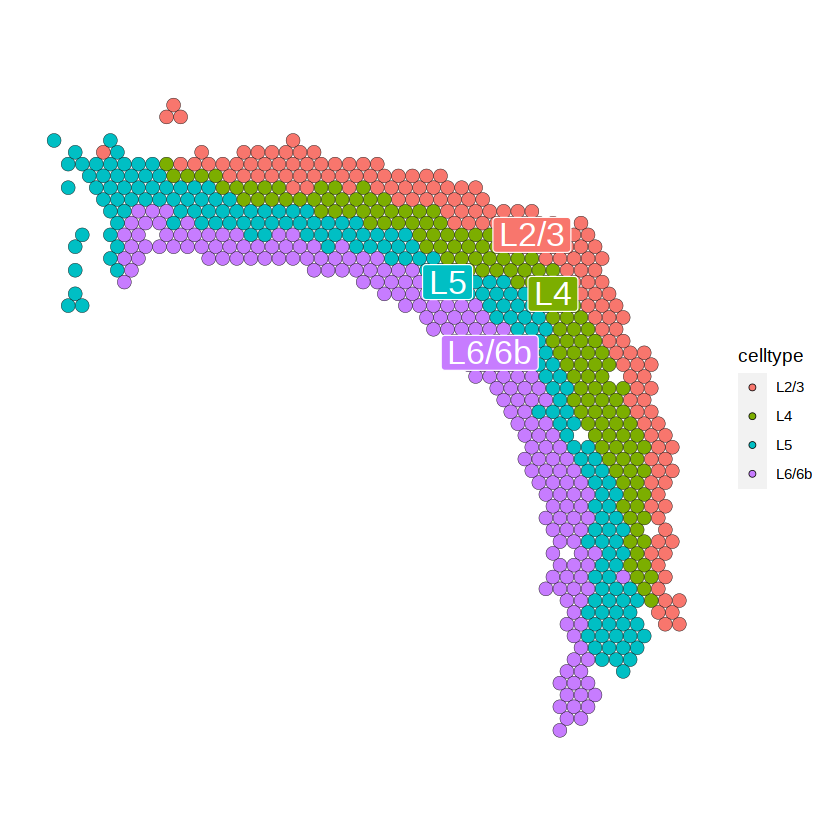

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



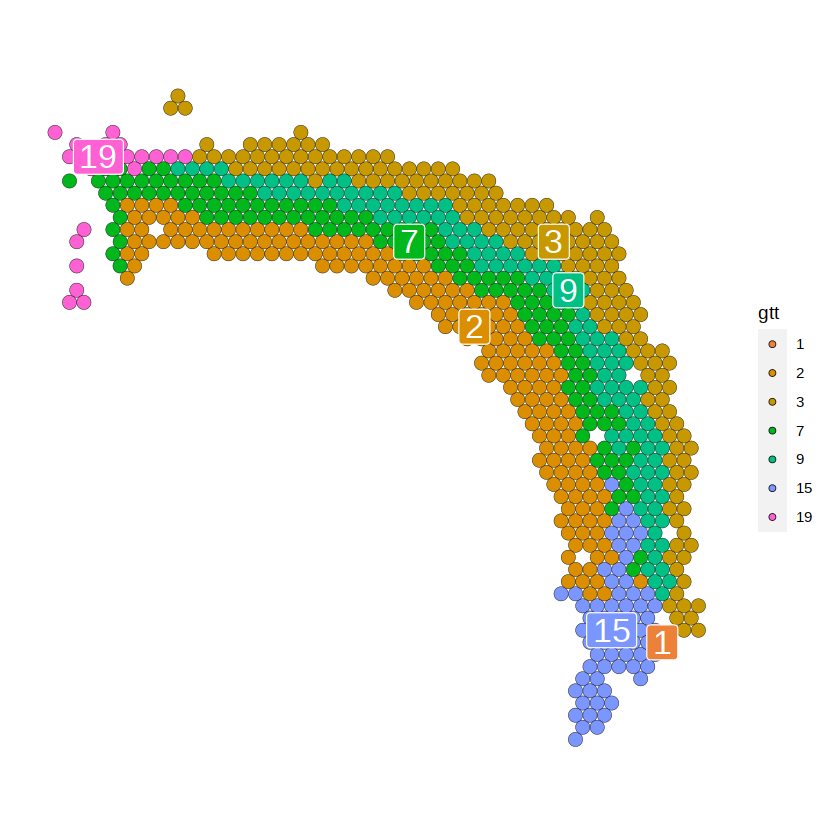

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



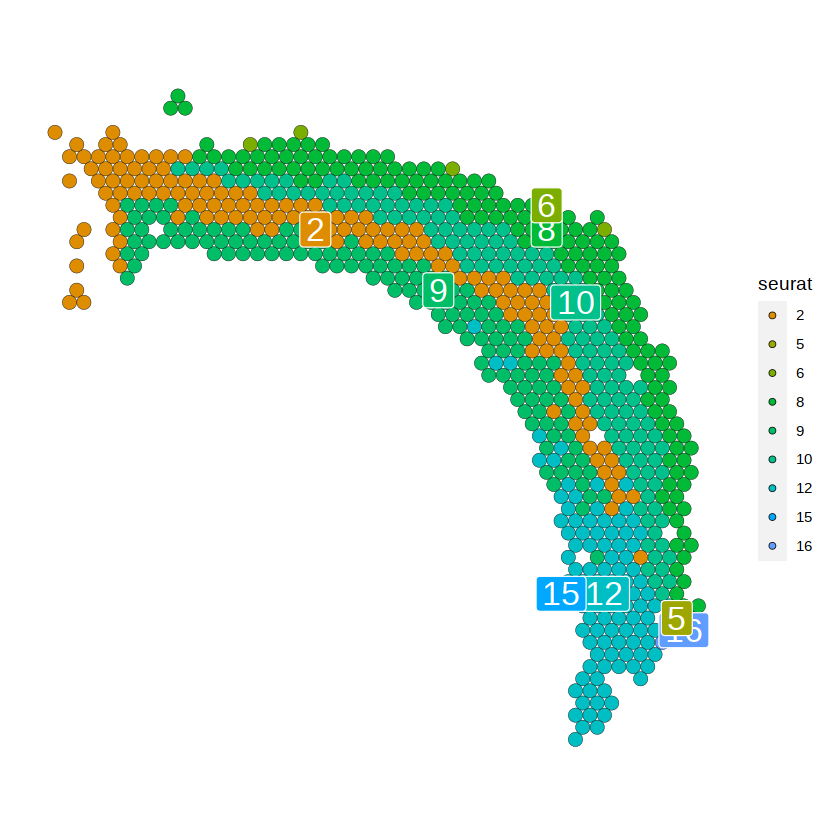

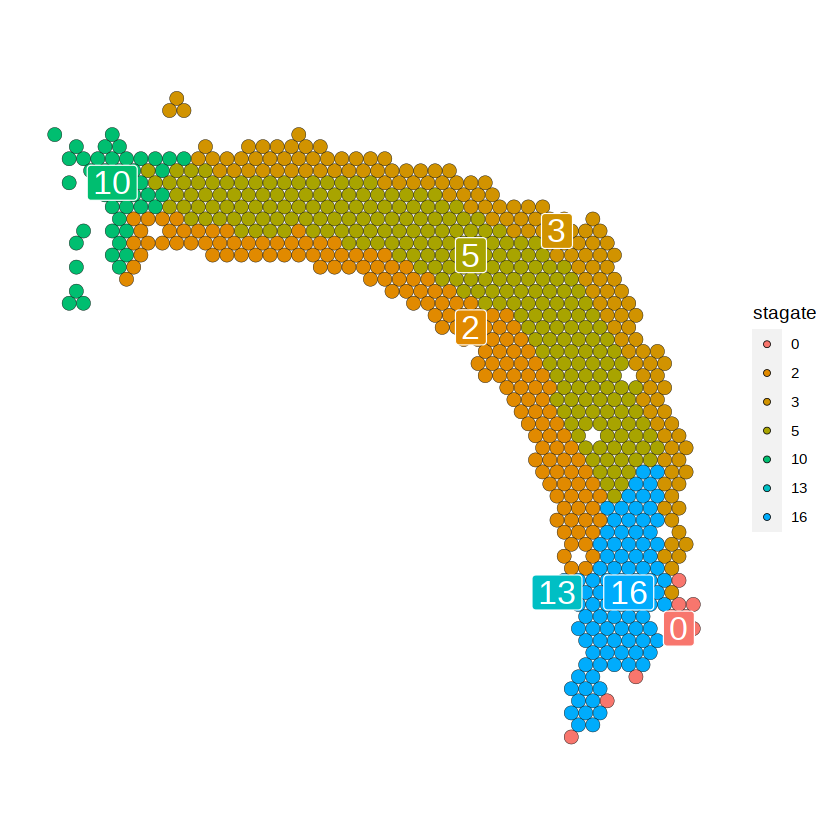

In [12]:
##########subset cortex region###########
obj.cortex<-subset(obj,subset=region=='Cortex')
# obj.cortex<-FindNeighbors(obj.cortex, dims=1:dim(embed1)[2],reduction="GTT")
# obj.cortex<-FindClusters(obj.cortex, resolution = 0.5)
# obj.cortex$gtt=obj.hippo$seurat_clusters
# DimPlot(obj.cortex,group.by="batch",label=T,reduction='GTT.umap')
# DimPlot(obj.cortex,group.by="celltype",label=T,reduction='GTT.umap')
# DimPlot(obj.cortex,group.by="gtt",label=T,reduction='GTT.umap')
obj.cortex1<-subset(obj.cortex,subset=batch==ub[1])
SpatialDimPlot(obj.cortex1,group.by="celltype",label=T,pt.size=5)
SpatialDimPlot(obj.cortex1,group.by="gtt",label=T,pt.size=5)
SpatialDimPlot(obj.cortex1,group.by="seurat",label=T,pt.size=5)
SpatialDimPlot(obj.cortex1,group.by="stagate",label=T,pt.size=5)

In [14]:
ari=data.frame(ARI_louvain=c(ARI(obj$gtt,obj$celltype),ARI(obj$seurat,obj$celltype),ARI(obj$stagate,obj$celltype),
                         ARI(obj$sedr,obj$celltype),ARI(obj$harmony,obj$celltype)),
           method=c('GraphSCIDRL','seurat','harmony_STAGATE','harmony_SEDR','harmony'))
ari
# write.csv(ari,paste(dirs,'metrics/ARI_louvain',flags,'.csv',sep=''))

ARI_louvain method         
1 0.2851576   GraphSCIDRL    
2 0.3086841   seurat         
3 0.2385609   harmony_STAGATE
4 0.1841108   harmony_SEDR   
5 0.2634904   harmony

In [12]:
read.csv(paste(dirs,'metrics/ARI_louvain',flags,'.csv',sep=''),header=T,row.names=1)

ARI_louvain method         
1 0.3029583   GraphSCIDRL    
2 0.3086841   seurat         
3 0.2385609   harmony_STAGATE
4 0.1841108   harmony_SEDR   
5 0.2634904   harmony